In [1]:
library(bnlearn)


Attaching package: ‘bnlearn’

The following object is masked from ‘package:stats’:

    sigma



Loading required namespace: Rgraphviz


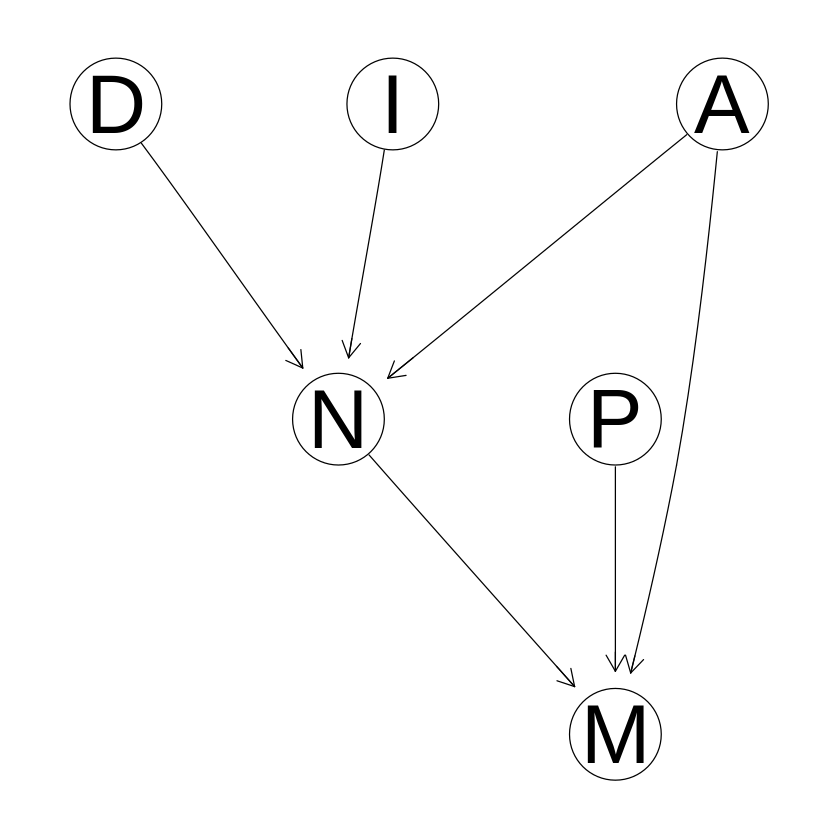

In [2]:
dag <- empty.graph(nodes = c("D", "I", "N", "M", "P", "A"))
arc.set <- matrix(c(                    "D", "N",
                    "I", "N",
                    "N",  "M",
                    "P", "M", 
                    "A", "M",
                    "A", "N"
                    ), 
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag) <- arc.set
graphviz.plot(dag)

 **¿D y M d-separados dado que conocemos N?**
 
 Tenemos dos caminos: 
 
 D -> N -> M: No activo.  
 
 D -> N <- A -> M: Activo porque conocemos N, sobre el que converge la única v-estructura.
 
 Concluimos que no están d-separados porque existe un camino activo.
 
  **¿D e I d-separados dado que conocemos M?**
  
  Tenemos un camino: D-> N <- I: Activo porque sobre N cae una v-estructura; y un descendiente de N, M, está en el conjunto de variables aleatorias cuyo valor conocemos.
  
  Por tanto no están d-separados porque existe un camino activo.
  
   **¿D e I d-separados dado que conocemos A?**
  
  Tenemos un camino: D-> N <- I: No Activo porque sobre N cae una v-estructura y ni N ni sus descendientes están en el conjunto de nodos conocidos.
  
  Por tanto están d-separados porque no existe camino activo (por tanto D e I son independientes dado A).

   **¿A y P d-separados dado que conocemos M, N y D?**

  Tenemos dos caminos posibles:
  
  A -> M <- P: Activo, M pertenece al conjunto de nodos cuyo valor conocemos.
  
  A -> N -> M <- P: No activo: N pertenece al conjunto de nodos que conocemos. 
  
  Por tanto no están d-separados.
  
   **¿A y P d-separados dado que conocemos N, D, I?**

  Tenemos dos caminos posibles:
  
  A -> M <- P: No Activo, M no pertenece al conjunto de nodos cuyo valor conocemos.
  
  A -> N -> M <- P: No activo: N pertenece al conjunto de nodos que conocemos y corta la dependencia. También la corta M, en este caso porque no lo conocemos y sobre él recae una v-estructura. 
  
  Por tanto están d-separados.

In [3]:
dsep(dag, "M", "D", "N")
dsep(dag, "D", "I", "M")
dsep(dag, "D", "I", "A")
dsep(dag, "A", "P", c("M", "N", "D"))
dsep(dag, "A", "P", c("N", "D", "I"))

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE